Eric Nguyen

# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [1]:
# your code
import pandas as pd

insurance_df = pd.read_csv('insurance.csv')

print(insurance_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


The numerical features are:

- age
- bmi
- children
- charges

and the categorical features are:

- sex
- smoker
- region

### Q2. Check whether there are missing values in this dataset.

In [2]:
# your code
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in this dataset.

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

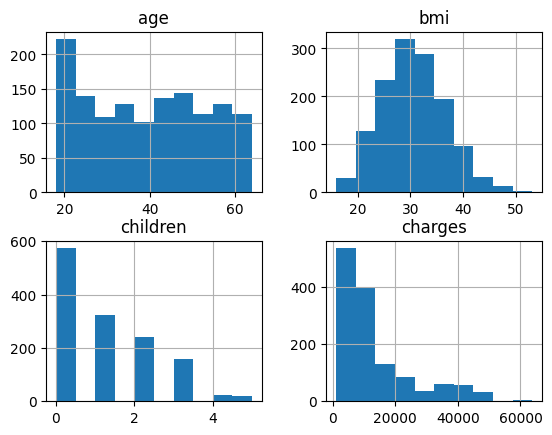

In [3]:
# your code
import matplotlib.pyplot as plt

insurance_df.hist()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [4]:
# your code
insurance_corr = insurance_df.corr(numeric_only=True)
insurance_corr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

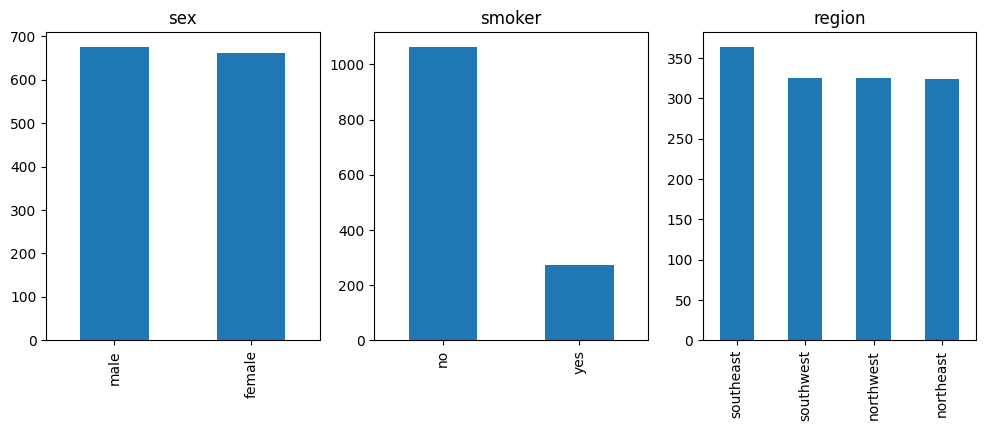

In [5]:
# your code
insurance_df_categorical = insurance_df.select_dtypes(exclude='number')

plt.figure(figsize=(12, 4))
for i, col in enumerate(insurance_df_categorical):
    plt.subplot(1, 3, i + 1)
    plt.title(col)
    insurance_df[col].value_counts().plot(kind = 'bar')

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [6]:
# your code
from sklearn.preprocessing import OneHotEncoder

insurance_df_encoded = insurance_df.copy()

encoder = OneHotEncoder(sparse_output=False)
encoder_transform = encoder.fit_transform(insurance_df_encoded[insurance_df_categorical.columns])
encoder_transform_df = pd.DataFrame(encoder_transform, columns=encoder.get_feature_names_out())

insurance_df_encoded = pd.concat([insurance_df_encoded, encoder_transform_df], axis=1)
insurance_df_encoded = insurance_df_encoded.drop(insurance_df_categorical.columns, axis=1)
insurance_df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Q7. Normalize all numerical features

In [7]:
# your code
insurance_df_encoded_normalized = insurance_df_encoded.copy()

x_min = insurance_df_encoded_normalized.min(axis=0)
x_max = insurance_df_encoded_normalized.max(axis=0)
insurance_df_encoded_normalized = (insurance_df_encoded_normalized - x_min) / (x_max - x_min)
insurance_df_encoded_normalized

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,0.017305,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,0.008108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,0.014144,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [8]:
insurance_df_encoded_normalized.to_csv('insurance_preprocessed.csv', index=False)